## Sources

**Author**: Bryan Owens

**Date**: 12/1/2021

**FiveThirtyEight data**: scraped from the source code of the [FiveThirtyEight Biden Approval Rating webpage](https://projects.fivethirtyeight.com/biden-approval-rating/)

**S&P 500 data**: downloaded from [MarketWatch](https://www.marketwatch.com/investing/index/spx/download-data?startDate=1/23/2021&endDate=12/1/2021)

## Imports & config

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# You can comment this cell out if you don't want to change your default plt size settings
plt.rcParams['figure.figsize'] = (30, 20)
plt.rcParams['figure.dpi'] = 140
plt.rcParams['font.size'] = 32
plt.rcParams['lines.linewidth'] = 5

## Read & clean disapproval ratings

In [3]:
agg_approvals = pd.read_json('biden_ratings.json').rename(columns = {'disapprove_estimate': 'biden_disapproval_rating'})
agg_approvals

date  future   subgroup  approve_estimate  approve_hi  approve_lo  \
0   2021-01-23   False  All polls         52.974300   58.214020   47.734580   
1   2021-01-24   False  All polls         52.974300   58.214020   47.734580   
2   2021-01-25   False  All polls         54.992500   59.998420   49.986580   
3   2021-01-26   False  All polls         54.807250   59.792970   49.821530   
4   2021-01-27   False  All polls         53.949072   58.633175   49.264969   
..         ...     ...        ...               ...         ...         ...   
558 2022-08-04    True  All polls         43.087881   55.993454   30.182308   
559 2022-08-05    True  All polls         43.086930   56.016827   30.157033   
560 2022-08-06    True  All polls         43.085965   56.040172   30.131758   
561 2022-08-07    True  All polls         43.084987   56.063489   30.106484   
562 2022-08-08    True  All polls         43.083995   56.086778   30.081212   

     biden_disapproval_rating  disapprove_hi  disapprove_lo  
0                   36.039070      41.278790      30.799350  
1                   36.039070      41.278790      30.799350  
2                   37.270060      42.275980      32.264140  
3                   37.498610      42.484330      32.512890  
4                   35.094130      39.778233      30.410028  
..                        ...            ...            ...  
558                 50.434844      63.905599      36.964089  
559                 50.434836      63.929494      36.940177  
560                 50.434838      63.953386      36.916289  
561                 50.434850      63.977275      36.892424  
562                 50.434871      64.001162      36.868581  

[563 rows x 9 columns]

In [4]:
disapprovals = agg_approvals[agg_approvals['date'] <= '2021-12-01'].sort_values('date')
disapprovals = disapprovals[['date', 'biden_disapproval_rating']]
disapprovals

date  biden_disapproval_rating
0   2021-01-23                 36.039070
1   2021-01-24                 36.039070
2   2021-01-25                 37.270060
3   2021-01-26                 37.498610
4   2021-01-27                 35.094130
..         ...                       ...
308 2021-11-27                 51.806104
309 2021-11-28                 51.806104
310 2021-11-29                 51.361603
311 2021-11-30                 51.284809
312 2021-12-01                 51.489896

[313 rows x 2 columns]

## Read & clean S&P closing prices

In [5]:
spx = pd.read_csv('spx_daily.csv')
spx

Date      Open      High       Low     Close
0    12/01/2021  4,602.82  4,652.94  4,510.27  4,513.04
1    11/30/2021  4,640.25  4,646.02  4,560.00  4,567.00
2    11/29/2021  4,628.75  4,672.95  4,625.26  4,655.27
3    11/26/2021  4,664.63  4,664.63  4,585.43  4,594.62
4    11/24/2021  4,675.78  4,702.87  4,659.89  4,701.46
..          ...       ...       ...       ...       ...
212  01/29/2021  3,778.05  3,778.05  3,694.12  3,714.24
213  01/28/2021  3,755.75  3,830.50  3,755.75  3,787.38
214  01/27/2021  3,836.83  3,836.83  3,732.48  3,750.77
215  01/26/2021  3,862.96  3,870.90  3,847.78  3,849.62
216  01/25/2021  3,851.68  3,859.23  3,797.16  3,855.36

[217 rows x 5 columns]

In [6]:
spx['Date'] = pd.to_datetime(spx['Date'])
spx['Date']

0     2021-12-01
1     2021-11-30
2     2021-11-29
3     2021-11-26
4     2021-11-24
         ...    
212   2021-01-29
213   2021-01-28
214   2021-01-27
215   2021-01-26
216   2021-01-25
Name: Date, Length: 217, dtype: datetime64[ns]

In [7]:
spx_close = spx[spx['Date'] <= '2021-12-01'].rename(columns = {'Date': 'date', 'Close': 's&p_closing_price'}).sort_values('date')
spx_close = spx_close[['date', 's&p_closing_price']]
spx_close['s&p_closing_price'] = spx_close['s&p_closing_price'].apply(lambda number: float(''.join(number.split(','))))
spx_close

date  s&p_closing_price
216 2021-01-25            3855.36
215 2021-01-26            3849.62
214 2021-01-27            3750.77
213 2021-01-28            3787.38
212 2021-01-29            3714.24
..         ...                ...
4   2021-11-24            4701.46
3   2021-11-26            4594.62
2   2021-11-29            4655.27
1   2021-11-30            4567.00
0   2021-12-01            4513.04

[217 rows x 2 columns]

## Merge the two datasets

The merged dataset's date range is all market trading days in the range \[1/23/21, 12/1/21\]

In [8]:
combined = spx_close.merge(disapprovals, how = 'inner', on = 'date').set_index('date')
combined

s&p_closing_price  biden_disapproval_rating
date                                                   
2021-01-25            3855.36                 37.270060
2021-01-26            3849.62                 37.498610
2021-01-27            3750.77                 35.094130
2021-01-28            3787.38                 34.663625
2021-01-29            3714.24                 34.557801
...                       ...                       ...
2021-11-24            4701.46                 51.806104
2021-11-26            4594.62                 51.806104
2021-11-29            4655.27                 51.361603
2021-11-30            4567.00                 51.284809
2021-12-01            4513.04                 51.489896

[217 rows x 2 columns]

## Correlations

In [9]:
disapprove_vs_close_corr = combined.corr()
disapprove_vs_close_corr

s&p_closing_price  biden_disapproval_rating
s&p_closing_price                  1.000000                  0.902646
biden_disapproval_rating           0.902646                  1.000000

## Charts

### Date vs. Biden disapproval rating and S&P closing price

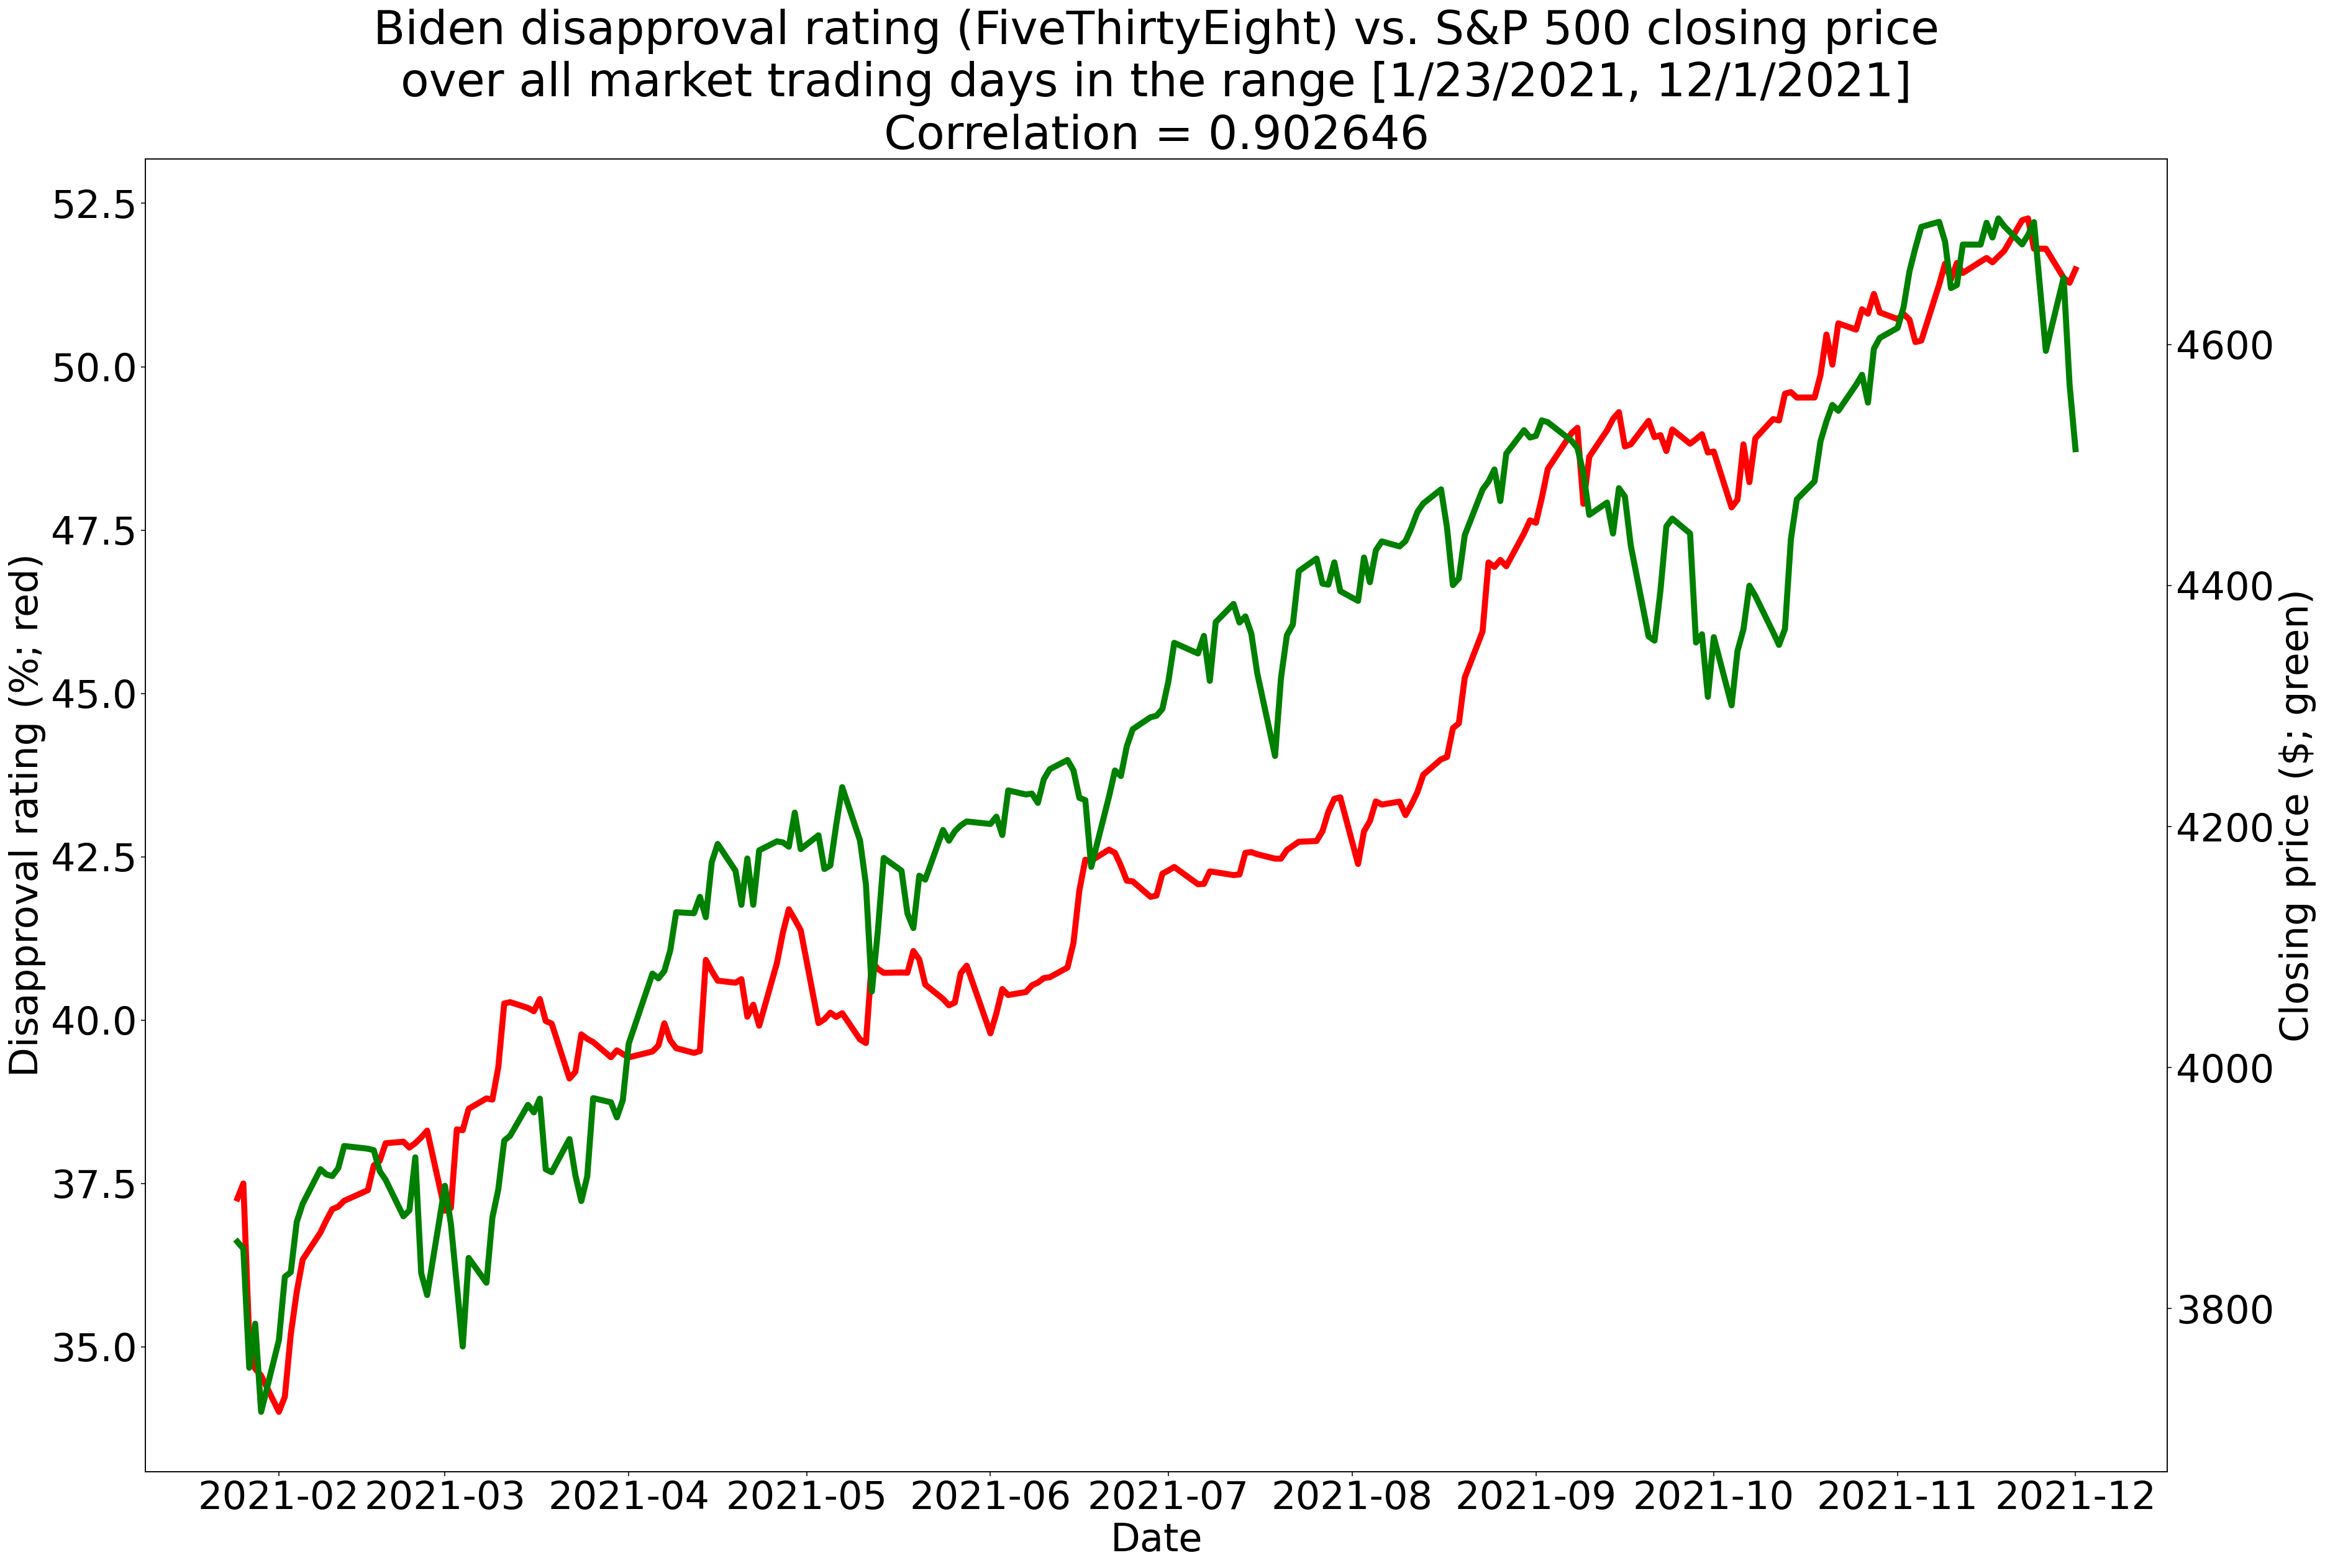

In [10]:
fig, ax0 = plt.subplots()

ax0.plot(combined.index, combined['biden_disapproval_rating'], color = 'red')
ax0.set_title('Biden disapproval rating (FiveThirtyEight) vs. S&P 500 closing price\nover all market trading days in the range [1/23/2021, 12/1/2021]\nCorrelation = 0.902646')
ax0.set_xlabel('Date')
ax0.set_ylabel('Disapproval rating (%; red)')

ax1 = ax0.twinx()
ax1.plot(combined.index, combined['s&p_closing_price'], color = 'green')
ax1.set_ylabel('Closing price ($; green)')
plt.show()

### Biden disapproval rating vs. S&P closing price

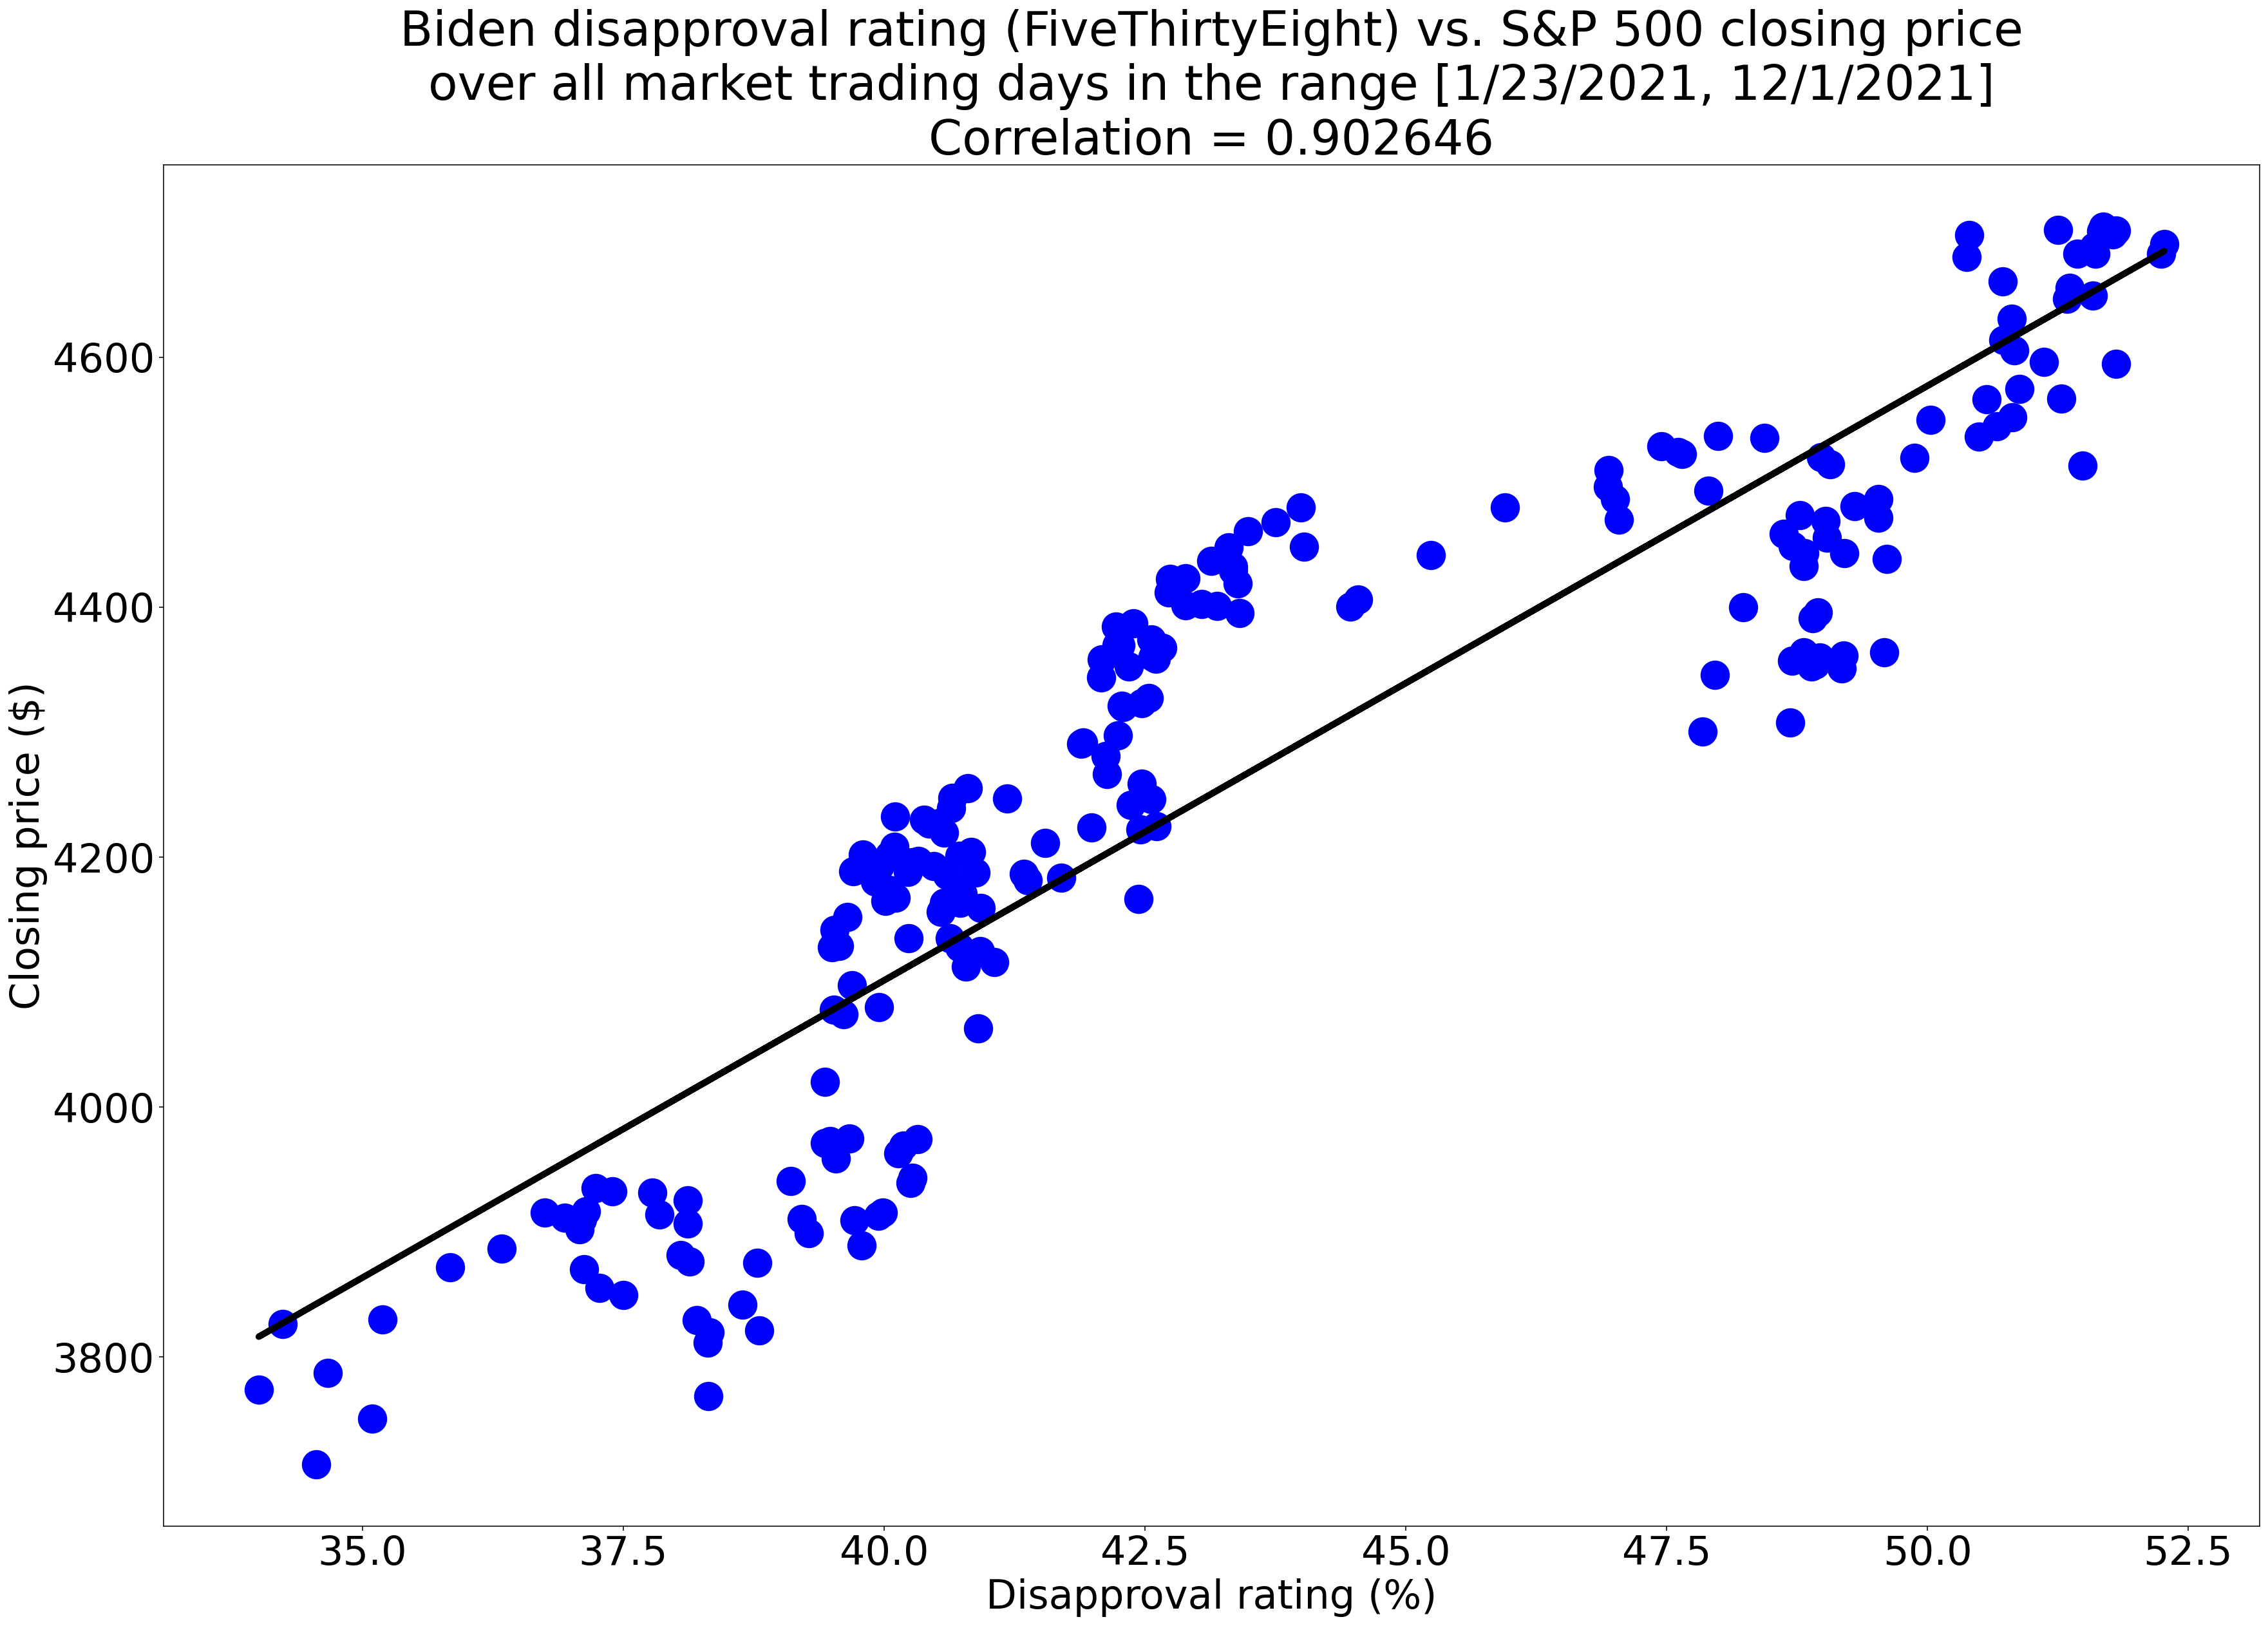

In [11]:
x = combined['biden_disapproval_rating']
y = combined['s&p_closing_price']
m, b = np.polyfit(x, y, 1)
plt.title('Biden disapproval rating (FiveThirtyEight) vs. S&P 500 closing price\nover all market trading days in the range [1/23/2021, 12/1/2021]\nCorrelation = 0.902646')
plt.xlabel('Disapproval rating (%)')
plt.ylabel('Closing price ($)')
plt.scatter(x, y, s = 500, marker = 'o', color = 'blue')
plt.plot(x, m*x + b, color = 'black')
plt.show()